# Explore the 5 years of lakes -- 
### remove redundancies, set aside small ones, plot interesting ones

[Clean 7-day equator case](#cleancase)

### Package imports

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

import os         
from glob import glob
import xarray as xr

from shapely import geometry
import pandas as pd
import geopandas as gp

from datetime import datetime

In [7]:
pd

<module 'pandas' from '/Users/brianmapes/opt/miniconda3/envs/geopy/lib/python3.10/site-packages/pandas/__init__.py'>

In [5]:
def showme(filename):   # like '2014_05_15_02_lat9p247N.geojson'
    gdf = gp.read_file('GEOJSONS/' + filename)
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(30, 93)
    ax.set_ylim(-30,30)
    ax.set_title(filename)

    gdf.drop_duplicates().plot(ax=ax, column='time', facecolor='none', alpha=1, cmap='jet') #, legend=True)
    #plt.colorbar()
    #gdf.boundary.plot(ax=ax, color='black')
    
    path = gp.datasets.get_path('naturalearth_lowres')
    mapdf = gp.read_file(path)
    mapdf.boundary.plot(ax=ax)
    # print(gdf)
    return(gdf)

In [8]:
df = pd.read_csv('ccvls_stats.csv')
df

Unnamed: 0             lasttime          duration       areatime  \
0              0  2018-12-31 23:00:00   0 days 13:00:00    2570.685677   
1              1  2018-12-30 16:00:00   0 days 15:00:00      39.620679   
2              2  2018-12-27 23:00:00   0 days 11:00:00      29.779736   
3              3  2018-12-27 10:00:00   0 days 17:00:00      42.804936   
4              4  2018-12-26 10:00:00   0 days 00:00:00       2.194071   
...          ...                  ...               ...            ...   
2700           0  2014-01-22 04:00:00  21 days 04:00:00  106376.665743   
2701           0  2014-01-16 18:00:00  15 days 18:00:00   85793.559576   
2702           0  2014-01-12 15:00:00  11 days 15:00:00   67879.437595   
2703           0  2014-01-10 09:00:00   9 days 09:00:00   57732.467913   
2704           0  2014-01-03 13:00:00   2 days 13:00:00   12507.403161   

      tqv_values     maxarea                         filename  
0           55.0  267.411157  2018_12_31_23_lat7p515N.geojson  
1           55.0    6.297093  2018_12_30_16_lat18p16S.geojson  
2           55.0    3.714629  2018_12_27_23_lat12p93S.geojson  
3           55.0    3.904742  2018_12_27_10_lat15p48S.geojson  
4           55.0    2.194071  2018_12_26_10_lat13p45S.geojson  
...          ...         ...                              ...  
2700        55.0  450.351350  2014_01_22_04_lat22p70S.geojson  
2701        55.0  450.351350  2014_01_16_18_lat22p00S.geojson  
2702        55.0  450.351350  2014_01_12_15_lat18p24S.geojson  
2703        55.0  450.351350  2014_01_10_09_lat12p51S.geojson  
2704        55.0  265.968399  2014_01_03_13_lat15p44S.geojson  

[2705 rows x 7 columns]

# Minimize redundancies with maxarea and yyyy-mm-dd-hh the same 

# Preprocessing
1. drop_duplicates based on maxarea and terminal time
2. add columns dur_days, yyyy, mm, meanlat
3. drop Unnamed column, index of .to_file(...csv)
4. reindex

In [9]:
ymdh = [df.filename.values[i][0:13] for i in range(len(df))]
#ymdh
df['ymdh'] = ymdh
df

Unnamed: 0             lasttime          duration       areatime  \
0              0  2018-12-31 23:00:00   0 days 13:00:00    2570.685677   
1              1  2018-12-30 16:00:00   0 days 15:00:00      39.620679   
2              2  2018-12-27 23:00:00   0 days 11:00:00      29.779736   
3              3  2018-12-27 10:00:00   0 days 17:00:00      42.804936   
4              4  2018-12-26 10:00:00   0 days 00:00:00       2.194071   
...          ...                  ...               ...            ...   
2700           0  2014-01-22 04:00:00  21 days 04:00:00  106376.665743   
2701           0  2014-01-16 18:00:00  15 days 18:00:00   85793.559576   
2702           0  2014-01-12 15:00:00  11 days 15:00:00   67879.437595   
2703           0  2014-01-10 09:00:00   9 days 09:00:00   57732.467913   
2704           0  2014-01-03 13:00:00   2 days 13:00:00   12507.403161   

      tqv_values     maxarea                         filename           ymdh  
0           55.0  267.411157  2018_12_31_23_lat7p515N.geojson  2018_12_31_23  
1           55.0    6.297093  2018_12_30_16_lat18p16S.geojson  2018_12_30_16  
2           55.0    3.714629  2018_12_27_23_lat12p93S.geojson  2018_12_27_23  
3           55.0    3.904742  2018_12_27_10_lat15p48S.geojson  2018_12_27_10  
4           55.0    2.194071  2018_12_26_10_lat13p45S.geojson  2018_12_26_10  
...          ...         ...                              ...            ...  
2700        55.0  450.351350  2014_01_22_04_lat22p70S.geojson  2014_01_22_04  
2701        55.0  450.351350  2014_01_16_18_lat22p00S.geojson  2014_01_16_18  
2702        55.0  450.351350  2014_01_12_15_lat18p24S.geojson  2014_01_12_15  
2703        55.0  450.351350  2014_01_10_09_lat12p51S.geojson  2014_01_10_09  
2704        55.0  265.968399  2014_01_03_13_lat15p44S.geojson  2014_01_03_13  

[2705 rows x 8 columns]

# drop duplicates, leaving only dfu = unique 

In [10]:
dfu = df.drop_duplicates('maxarea') # unique in terms of max area
len(dfu)


2441

In [11]:
#dfu = dfu.drop_duplicates('ymdh') # unique in terms of timestamp part of filename 
# (actually there is some difference between 2017-05-09-01 and nearby times ?)
len(dfu)

2441

In [12]:
filenames = dfu.filename.values        # values are strings
sign_fromNS = dict( [['N',1],['S',-1]] )

signs, abslats = [], []
for i in range(len(filenames)):
    filenames[i][17:22].replace('p','.')
#    abslats.append( latstr ) 
    abslats.append( float(          filenames[i][17:22].replace('p','.') ) )
    signs.append(   float(sign_fromNS.get(filenames[i][22:23])           ) )  

len(abslats)
len(signs)
coastlats = np.array(signs)*np.array(abslats)
coastlats

array([  7.515, -18.16 , -12.93 , ..., -12.9  , -11.47 , -15.44 ])

In [15]:
filenames = dfu.filename.values
durations = dfu.duration.values

yyyy = [ int(filenames[i][0:4]) for i in range(len(filenames)) ]
mm   = [ int(filenames[i][5:7]) for i in range(len(filenames)) ]
durd = [ int(durations[i][0:2]) for i in range(len(durations)) ]

# extract mean latituse from filename strings
sign_fromNS = dict( [['N',1],['S',-1]] )

signs, abslats = [], []
for i in range(len(filenames)):
    filenames[i][17:22].replace('p','.')
    abslats.append( float(          filenames[i][17:22].replace('p','.') ) )
    signs.append(   float(sign_fromNS.get(filenames[i][22:23])           ) )  

coastlats = np.array(signs)*np.array(abslats)

# Append columns
dfu['dur_days'] = durd
dfu['yyyy'] = yyyy
dfu['mm'] = mm
dfu['coastlat'] = coastlats

/var/folders/v9/8pr92c8s0m14426rc7jfm2c80000gn/T/ipykernel_26369/1211854894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfu['dur_days'] = durd
/var/folders/v9/8pr92c8s0m14426rc7jfm2c80000gn/T/ipykernel_26369/1211854894.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfu['yyyy'] = yyyy
/var/folders/v9/8pr92c8s0m14426rc7jfm2c80000gn/T/ipykernel_26369/1211854894.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [21]:
dfu.describe()

Unnamed: 0       areatime  tqv_values      maxarea     dur_days  \
count  2441.000000    2441.000000      2441.0  2441.000000  2441.000000   
mean   1350.791479     969.317116        55.0    30.332292     0.453093   
std     780.110053    5625.252946         0.0    75.778490     1.710728   
min       0.000000       1.001849        55.0     1.001849     0.000000   
25%     687.000000       2.158922        55.0     1.705525     0.000000   
50%    1355.000000       7.781272        55.0     3.096716     0.000000   
75%    2018.000000      94.098998        55.0    11.780465     0.000000   
max    2697.000000  140314.954315        55.0   699.206653    27.000000   

              yyyy           mm     coastlat  
count  2441.000000  2441.000000  2441.000000  
mean   2016.139697     5.736993    -5.239367  
std       1.393098     3.730751    10.341745  
min    2014.000000     1.000000   -24.130000  
25%    2015.000000     3.000000   -13.940000  
50%    2016.000000     5.000000    -7.041000  
75%    2017.000000    10.000000     2.520000  
max    2018.000000    12.000000    20.910000

# Size screening: duration > 1 day? size >2 deg^2?

In [17]:
#dfu2 = dfu[dfu.maxarea >2] # size > 2 degrees screener, but would rather screen for duration
#len(dfu2) 1643/2705 in 5 years 

In [18]:
dfu1 = dfu[dfu.dur_days >0]
len(dfu1)

325

In [19]:
len(dfu1[dfu1.maxarea > 2]) # wow there is a small one that lasts more than a day

324

In [20]:
dfu1.sort_values('maxarea').iloc[0] # maxarea 1.8, duration 28 hours! 

Unnamed: 0                                688
lasttime                  2017-11-13 12:00:00
duration                      1 days 04:00:00
areatime                            44.339248
tqv_values                               55.0
maxarea                              1.851988
filename      2017_11_13_12_lat3p284S.geojson
ymdh                            2017_11_13_12
dur_days                                    1
yyyy                                     2017
mm                                         11
coastlat                               -3.284
Name: 688, dtype: object

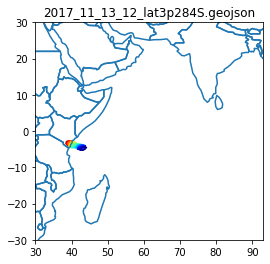

In [22]:
showme(dfu1.sort_values('maxarea').iloc[0].filename);

In [23]:
# reindex 
# dfu1['index'] = range(len(dfu1))
dfu1
# dfu.drop('Unnamed')

Unnamed: 0             lasttime          duration       areatime  \
10            10  2018-12-31 23:00:00   7 days 14:00:00    6320.271948   
11            11  2018-12-26 03:00:00   2 days 10:00:00     992.494980   
19            19  2018-12-26 09:00:00   7 days 04:00:00    6648.870745   
20            20  2018-12-26 01:00:00   6 days 20:00:00    7732.482920   
21            21  2018-12-22 18:00:00   3 days 13:00:00    3393.273348   
...          ...                  ...               ...            ...   
2655        2655  2014-02-03 18:00:00   5 days 04:00:00    2766.894796   
2658        2658  2014-02-04 13:00:00   6 days 20:00:00   11653.587736   
2659        2659  2014-02-02 13:00:00   4 days 20:00:00    8516.062828   
2698           0  2014-01-28 05:00:00  27 days 05:00:00  140314.954315   
2704           0  2014-01-03 13:00:00   2 days 13:00:00   12507.403161   

      tqv_values     maxarea                         filename           ymdh  \
10          55.0  115.775554  2018_12_31_23_lat10p00S.geojson  2018_12_31_23   
11          55.0   24.142663  2018_12_26_03_lat3p623N.geojson  2018_12_26_03   
19          55.0   78.347662  2018_12_26_09_lat13p57S.geojson  2018_12_26_09   
20          55.0  114.533092  2018_12_26_01_lat16p16S.geojson  2018_12_26_01   
21          55.0   67.408143  2018_12_22_18_lat9p548S.geojson  2018_12_22_18   
...          ...         ...                              ...            ...   
2655        55.0  358.361218  2014_02_03_18_lat19p64S.geojson  2014_02_03_18   
2658        55.0  156.925726  2014_02_04_13_lat16p86S.geojson  2014_02_04_13   
2659        55.0  329.238646  2014_02_02_13_lat10p83S.geojson  2014_02_02_13   
2698        55.0  450.351350  2014_01_28_05_lat11p47S.geojson  2014_01_28_05   
2704        55.0  265.968399  2014_01_03_13_lat15p44S.geojson  2014_01_03_13   

      dur_days  yyyy  mm  coastlat  
10           7  2018  12   -10.000  
11           2  2018  12     3.623  
19           7  2018  12   -13.570  
20           6  2018  12   -16.160  
21           3  2018  12    -9.548  
...        ...   ...  ..       ...  
2655         5  2014   2   -19.640  
2658         6  2014   2   -16.860  
2659         4  2014   2   -10.830  
2698        27  2014   1   -11.470  
2704         2  2014   1   -15.440  

[325 rows x 12 columns]

# Climatology plots

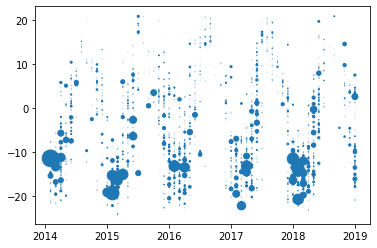

In [24]:
plt.scatter(dfu.yyyy + dfu.mm/12., dfu.coastlat, dfu.areatime/500)

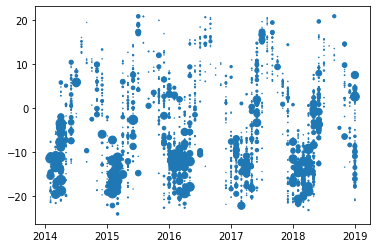

In [25]:
plt.scatter(dfu.yyyy + dfu.mm/12., dfu.coastlat, dfu.maxarea/5)

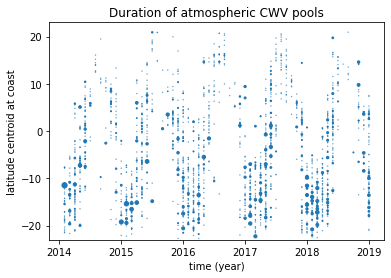

In [26]:
    fig, ax = plt.subplots()
    ax.set_ylim(-23,23)
    ax.set_title('Duration of atmospheric CWV pools')
    ax.set_ylabel('latitude centroid at coast')
    ax.set_xlabel('time (year)')

    plt.scatter(dfu.yyyy + dfu.mm/12., dfu.coastlat, dfu.dur_days+0.1)

<AxesSubplot:ylabel='Frequency'>

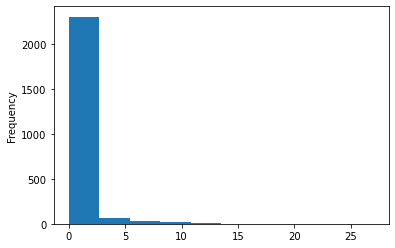

In [27]:
dfu.dur_days.plot.hist()

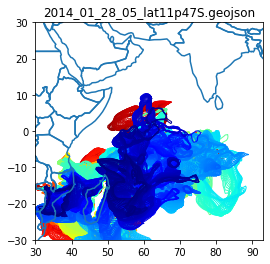

In [28]:
longest = dfu[dfu.dur_days > 25]
longest.filename.values[0]
showme(longest.filename.values[0]);

In [35]:
longest

Unnamed: 0             lasttime          duration       areatime  \
2698           0  2014-01-28 05:00:00  27 days 05:00:00  140314.954315   

      tqv_values    maxarea                         filename           ymdh  \
2698        55.0  450.35135  2014_01_28_05_lat11p47S.geojson  2014_01_28_05   

      dur_days  yyyy  mm  coastlat  
2698        27  2014   1    -11.47

In [31]:
equatorcases = dfu1[ abs(dfu1.coastlat) < 10 ] # 162 of them exceeding 1 day 
#len(equatorcases[ equatorcases.dur_days > 2 ]) # 60 exceeding 2 days 
#len(equatorcases[ equatorcases.dur_days > 3 ]) # 47 exceeding 3 days 
#len(equatorcases[ equatorcases.dur_days > 4 ]) # 36 exceeding 4 days 
#len(equatorcases[ equatorcases.dur_days > 5 ]) # 25 exceeding 5 days 
len(equatorcases[ equatorcases.dur_days > 6 ]) # 18 exceeding 6 days 
#len(equatorcases[ equatorcases.dur_days > 7 ]) # 12 exceeding 7 days 
#len(equatorcases[ equatorcases.dur_days > 8 ]) # 10 exceeding 8 days 
#len(equatorcases[ equatorcases.dur_days > 9 ]) # 7 exceeding 9 days 
#len(equatorcases[ equatorcases.dur_days > 10 ]) # 4 exceeding 10 days 

18

In [32]:
equatorcases.describe()

Unnamed: 0      areatime  tqv_values     maxarea    dur_days  \
count   162.000000    162.000000       162.0  162.000000  162.000000   
mean   1358.500000   3210.867449        55.0   68.497289    2.975309   
std     808.257333   4979.144383         0.0   79.553579    2.745862   
min      11.000000     44.339248        55.0    1.851988    1.000000   
25%     716.250000    317.427978        55.0   15.487335    1.000000   
50%    1294.500000   1049.848972        55.0   38.487539    2.000000   
75%    2073.000000   4765.103956        55.0   87.533028    4.000000   
max    2610.000000  29758.278037        55.0  425.693956   14.000000   

              yyyy          mm    coastlat  
count   162.000000  162.000000  162.000000  
mean   2016.055556    6.808642   -1.485772  
std       1.449995    3.486503    5.577464  
min    2014.000000    1.000000   -9.892000  
25%    2015.000000    4.000000   -6.779750  
50%    2016.000000    5.000000   -1.472500  
75%    2017.000000   11.000000    3.022250  
max    2018.000000   12.000000    9.819000

# Cases within 10 deg of the equator, and lasting a week or more

In [36]:
eq7cases = equatorcases[ equatorcases.dur_days > 6 ]
eq7cases

Unnamed: 0             lasttime          duration      areatime  \
102          102  2018-11-20 11:00:00   7 days 00:00:00   1892.647086   
109          109  2018-11-16 21:00:00   7 days 01:00:00   2667.686153   
137          137  2018-10-22 15:00:00   8 days 01:00:00   5261.462676   
673          673  2017-12-01 11:00:00  11 days 00:00:00   6534.053999   
863          863  2017-05-28 11:00:00   7 days 04:00:00   5690.601728   
944          944  2017-05-09 01:00:00  10 days 03:00:00  13759.444603   
945          945  2017-05-08 05:00:00   9 days 07:00:00   9695.018611   
973          973  2017-04-29 11:00:00   9 days 15:00:00   7493.295378   
974          974  2017-04-29 11:00:00   9 days 15:00:00   8972.043947   
1229        1229  2017-01-07 14:00:00   8 days 19:00:00  12738.007722   
1429        1429  2016-05-02 05:00:00  10 days 10:00:00  12023.310670   
1472        1472  2016-04-15 08:00:00  12 days 01:00:00  15284.772630   
1946        1946  2015-09-17 21:00:00  10 days 05:00:00  17089.620528   
2050        2050  2015-05-07 03:00:00  14 days 15:00:00  29758.278037   
2165        2165  2015-03-21 17:00:00   7 days 22:00:00   8398.895739   
2471        2471  2014-05-11 18:00:00   9 days 09:00:00   6060.850143   
2511        2511  2014-04-19 22:00:00  12 days 11:00:00  15066.057126   
2518        2518  2014-04-12 21:00:00   7 days 04:00:00   5008.481115   

      tqv_values     maxarea                         filename           ymdh  \
102         55.0   21.949572  2018_11_20_11_lat4p616S.geojson  2018_11_20_11   
109         55.0   74.513991  2018_11_16_21_lat8p412S.geojson  2018_11_16_21   
137         55.0  113.820949  2018_10_22_15_lat9p781N.geojson  2018_10_22_15   
673         55.0   92.725686  2017_12_01_11_lat9p845S.geojson  2017_12_01_11   
863         55.0   50.852737  2017_05_28_11_lat5p291S.geojson  2017_05_28_11   
944         55.0  308.867756  2017_05_09_01_lat3p355S.geojson  2017_05_09_01   
945         55.0  124.822389  2017_05_08_05_lat1p160N.geojson  2017_05_08_05   
973         55.0   97.229094  2017_04_29_11_lat7p001S.geojson  2017_04_29_11   
974         55.0  121.819141  2017_04_29_11_lat0p732S.geojson  2017_04_29_11   
1229        55.0  203.820924  2017_01_07_14_lat6p991S.geojson  2017_01_07_14   
1429        55.0  112.217718  2016_05_02_05_lat1p551S.geojson  2016_05_02_05   
1472        55.0  177.431898  2016_04_15_08_lat5p477S.geojson  2016_04_15_08   
1946        55.0  128.637937  2015_09_17_21_lat3p507N.geojson  2015_09_17_21   
2050        55.0  183.307769  2015_05_07_03_lat6p414S.geojson  2015_05_07_03   
2165        55.0  119.698346  2015_03_21_17_lat5p987N.geojson  2015_03_21_17   
2471        55.0   72.174952  2014_05_11_18_lat2p131S.geojson  2014_05_11_18   
2511        55.0  110.043930  2014_04_19_22_lat7p255S.geojson  2014_04_19_22   
2518        55.0   53.993684  2014_04_12_21_lat5p095N.geojson  2014_04_12_21   

      dur_days  yyyy  mm  coastlat  
102          7  2018  11    -4.616  
109          7  2018  11    -8.412  
137          8  2018  10     9.781  
673         11  2017  12    -9.845  
863          7  2017   5    -5.291  
944         10  2017   5    -3.355  
945          9  2017   5     1.160  
973          9  2017   4    -7.001  
974          9  2017   4    -0.732  
1229         8  2017   1    -6.991  
1429        10  2016   5    -1.551  
1472        12  2016   4    -5.477  
1946        10  2015   9     3.507  
2050        14  2015   5    -6.414  
2165         7  2015   3     5.987  
2471         9  2014   5    -2.131  
2511        12  2014   4    -7.255  
2518         7  2014   4     5.095

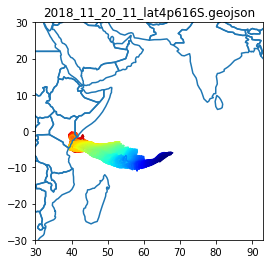

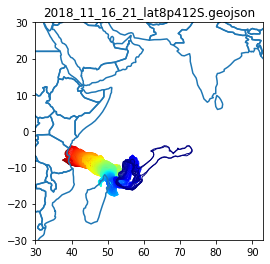

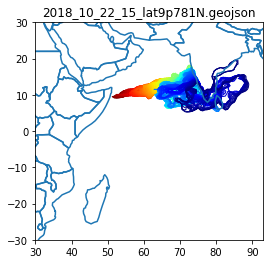

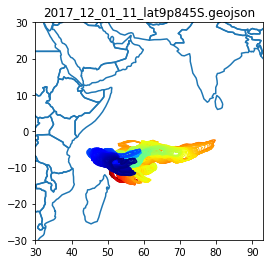

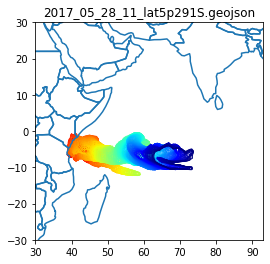

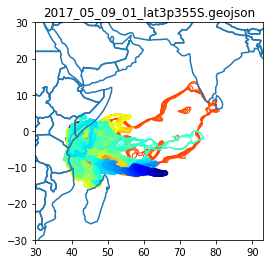

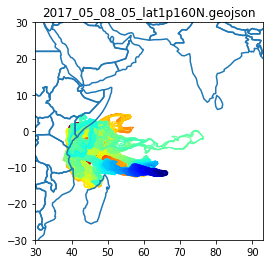

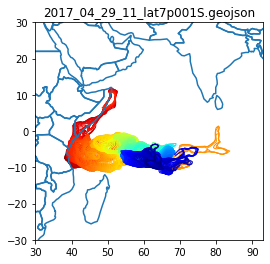

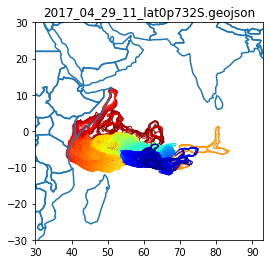

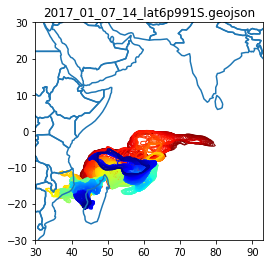

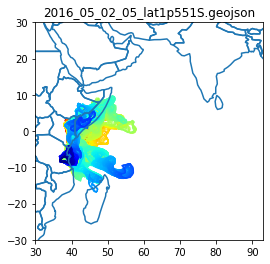

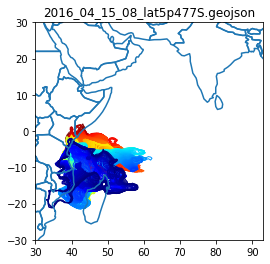

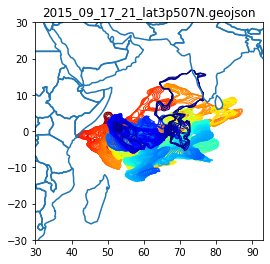

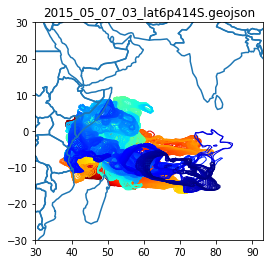

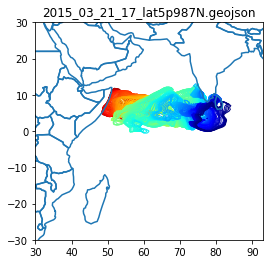

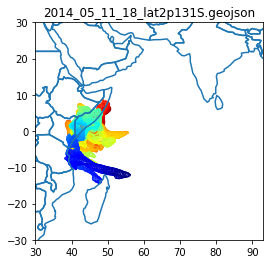

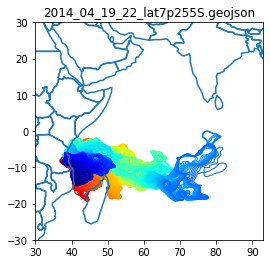

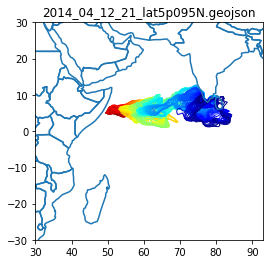

In [34]:
# Display them all 

for file in eq7cases.filename: 
    gdf = showme(file)

<a id='cleancase'></a>
-------------

# Pick a clean case and plot MERRA2 tqv field


In [63]:
# Pick a clean one
eq7cases.iloc[4]

Unnamed: 0                                863
lasttime                  2017-05-28 11:00:00
duration                      7 days 04:00:00
areatime                          5690.601728
tqv_values                               55.0
maxarea                             50.852737
filename      2017_05_28_11_lat5p291S.geojson
ymdh                            2017_05_28_11
dur_days                                    7
yyyy                                     2017
mm                                          5
coastlat                               -5.291
Name: 863, dtype: object

In [53]:
import xarray as xr

In [45]:
# MERRA or NCAR RDA: authenticated? 
URL = 'dods://goldsmr4.gesdisc.eosdis.nasa.gov/dods/M2I1NXASM'
#testURL = 'https://goldsmr5.gesdisc.eosdis.nasa.gov/dods/M2I3NPASM'
#testURL = 'https://rda.ucar.edu/thredds/dodsC/files/g/ds084.1/2021/20210719/gfs.0p25.2021071900.f024.grib2'
ds = xr.open_dataset(URL).sel(time='2017-05-28 00:00:00', lat=slice(-25,25), lon=slice(40,100))
ds

/Users/brianmapes/opt/miniconda3/envs/geopy/lib/python3.10/site-packages/xarray/coding/times.py:144: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset>
Dimensions:  (time: 1, lat: 101, lon: 97)
Coordinates:
  * time     (time) datetime64[ns] 2017-05-28
  * lat      (lat) float64 -25.0 -24.5 -24.0 -23.5 -23.0 ... 23.5 24.0 24.5 25.0
  * lon      (lon) float64 40.0 40.62 41.25 41.88 ... 98.12 98.75 99.38 100.0
Data variables: (12/24)
    disph    (time, lat, lon) float32 ...
    ps       (time, lat, lon) float32 ...
    qv10m    (time, lat, lon) float32 ...
    qv2m     (time, lat, lon) float32 ...
    slp      (time, lat, lon) float32 ...
    t10m     (time, lat, lon) float32 ...
    ...       ...
    u10m     (time, lat, lon) float32 ...
    u2m      (time, lat, lon) float32 ...
    u50m     (time, lat, lon) float32 ...
    v10m     (time, lat, lon) float32 ...
    v2m      (time, lat, lon) float32 ...
    v50m     (time, lat, lon) float32 ...
Attributes:
    title:        MERRA-2 inst1_2d_asm_Nx: 2d,1-Hourly,Instantaneous,Single-L...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Tue Mar 08 19:06:23 GMT 2022 : imported by GrADS Data Serve...

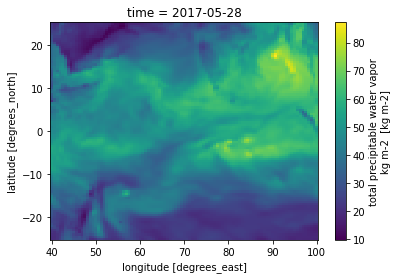

In [46]:
ds.tqv.plot()

In [51]:
# animate a whole day 
ds = xr.open_dataset(URL).sel(time=slice('2017-05-27 00:00:00','2017-05-28 00:00:00'),
                                         lat=slice(-25,25), lon=slice(40,100))
ds

<xarray.Dataset>
Dimensions:  (time: 25, lat: 101, lon: 97)
Coordinates:
  * time     (time) datetime64[ns] 2017-05-27 ... 2017-05-28
  * lat      (lat) float64 -25.0 -24.5 -24.0 -23.5 -23.0 ... 23.5 24.0 24.5 25.0
  * lon      (lon) float64 40.0 40.62 41.25 41.88 ... 98.12 98.75 99.38 100.0
Data variables: (12/24)
    disph    (time, lat, lon) float32 ...
    ps       (time, lat, lon) float32 ...
    qv10m    (time, lat, lon) float32 ...
    qv2m     (time, lat, lon) float32 ...
    slp      (time, lat, lon) float32 ...
    t10m     (time, lat, lon) float32 ...
    ...       ...
    u10m     (time, lat, lon) float32 ...
    u2m      (time, lat, lon) float32 ...
    u50m     (time, lat, lon) float32 ...
    v10m     (time, lat, lon) float32 ...
    v2m      (time, lat, lon) float32 ...
    v50m     (time, lat, lon) float32 ...
Attributes:
    title:        MERRA-2 inst1_2d_asm_Nx: 2d,1-Hourly,Instantaneous,Single-L...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Tue Mar 08 19:06:23 GMT 2022 : imported by GrADS Data Serve...

In [52]:
# from https://xarray-contrib.github.io/xarray-tutorial/scipy-tutorial/04_plotting_and_visualization.html
# set constant colorbar limits
ds.tqv.hvplot(
    groupby="time",  # adds a widget for time
    clim=(0, 70),  # sets colormap limits
    widget_type="scrubber",
    widget_location="bottom",
)

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=24, width=550)
        [2] HSpacer()

In [474]:
horncases = dfu1[ (dfu1.coastlat) > 10 ] # about a dozen
horncases

Unnamed: 0             lasttime         duration     areatime  \
138          138  2018-10-15 05:00:00  6 days 08:00:00  6556.689566   
162          162  2018-06-06 22:00:00  1 days 17:00:00   170.383847   
193          193  2018-05-27 13:00:00  3 days 01:00:00  1863.468630   
700          700  2017-11-09 08:00:00  1 days 08:00:00   395.409853   
896          896  2017-05-16 09:00:00  1 days 23:00:00   479.228467   
933          933  2017-05-01 01:00:00  1 days 02:00:00   100.855653   
1343        1343  2016-07-31 09:00:00  2 days 05:00:00  2041.861504   
1457        1457  2016-04-16 09:00:00  3 days 10:00:00  1033.812542   
1829        1829  2015-11-20 08:00:00  1 days 11:00:00   170.344179   
1965        1965  2015-06-12 03:00:00  2 days 11:00:00  2308.793230   
2434        2434  2014-05-17 06:00:00  2 days 03:00:00  1968.376675   

      tqv_values    maxarea                         filename           ymdh  \
138         55.0  88.656819  2018_10_15_05_lat14p60N.geojson  2018_10_15_05   
162         55.0   6.778012  2018_06_06_22_lat13p28N.geojson  2018_06_06_22   
193         55.0  63.162654  2018_05_27_13_lat19p73N.geojson  2018_05_27_13   
700         55.0  20.468933  2017_11_09_08_lat14p42N.geojson  2017_11_09_08   
896         55.0  21.130774  2017_05_16_09_lat12p74N.geojson  2017_05_16_09   
933         55.0   5.984780  2017_05_01_01_lat12p03N.geojson  2017_05_01_01   
1343        55.0  47.623089  2016_07_31_09_lat14p67N.geojson  2016_07_31_09   
1457        55.0  22.302923  2016_04_16_09_lat14p64N.geojson  2016_04_16_09   
1829        55.0   8.449090  2015_11_20_08_lat10p36N.geojson  2015_11_20_08   
1965        55.0  65.210616  2015_06_12_03_lat20p89N.geojson  2015_06_12_03   
2434        55.0  89.180362  2014_05_17_06_lat10p43N.geojson  2014_05_17_06   

      dur_days  yyyy  mm  coastlat  
138          6  2018  10     14.60  
162          1  2018   6     13.28  
193          3  2018   5     19.73  
700          1  2017  11     14.42  
896          1  2017   5     12.74  
933          1  2017   5     12.03  
1343         2  2016   7     14.67  
1457         3  2016   4     14.64  
1829         1  2015  11     10.36  
1965         2  2015   6     20.89  
2434         2  2014   5     10.43

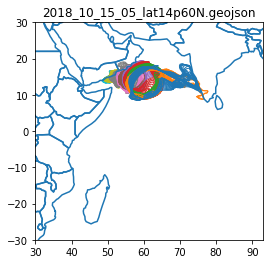

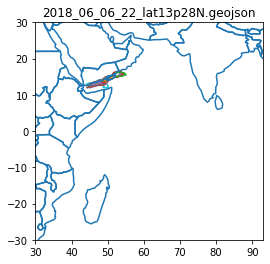

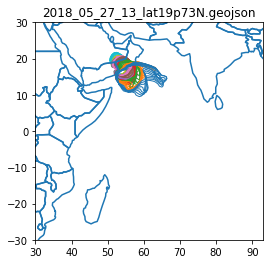

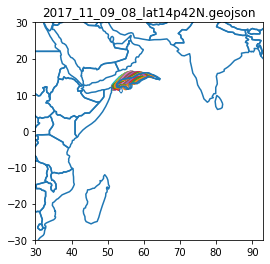

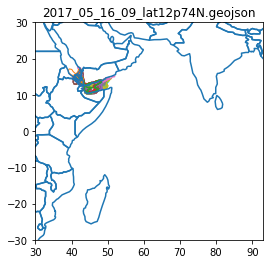

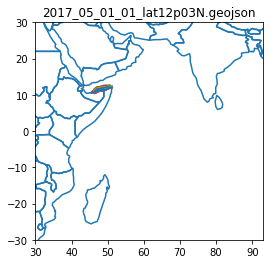

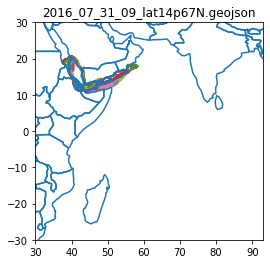

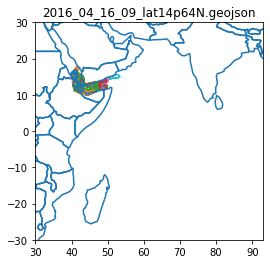

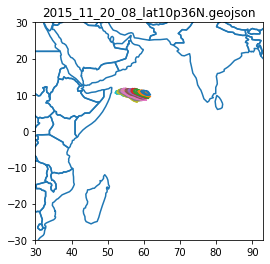

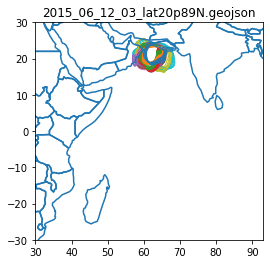

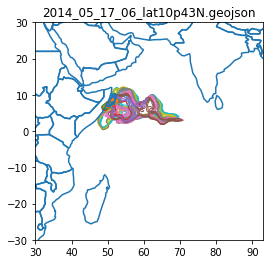

In [475]:
for file in horncases.filename: 
    gdf = showme(file)

In [479]:
SHcases = dfu1[ dfu1.coastlat < -10 ] #  of them exceeding 1 day 
SH7cases = SHcases[ SHcases.dur_days > 6 ] # 31 of them  
len(SH7cases)

31

<ipython-input-301-8ebb951dfd07>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


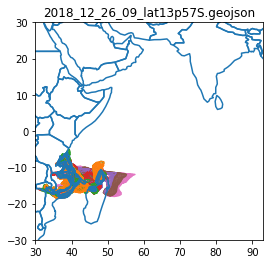

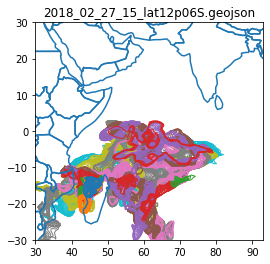

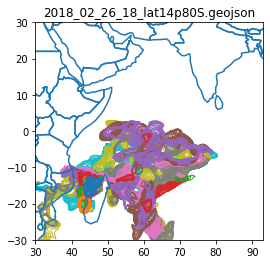

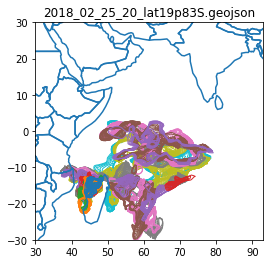

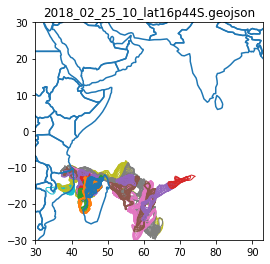

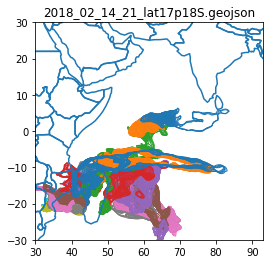

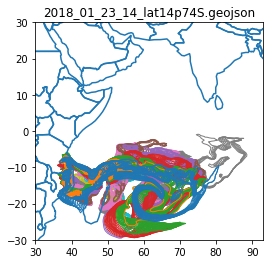

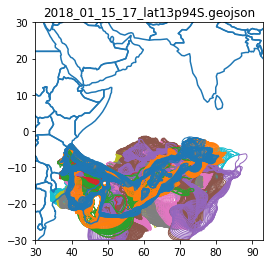

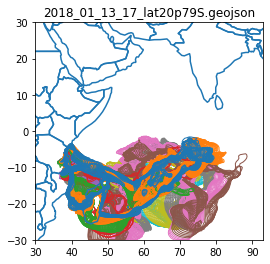

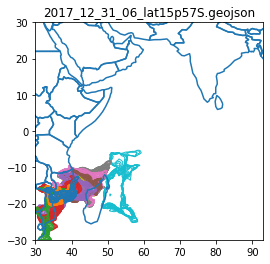

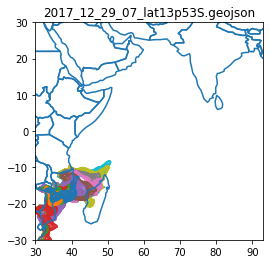

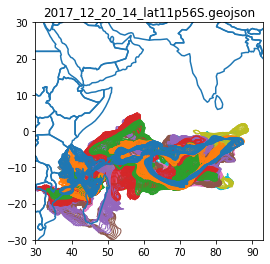

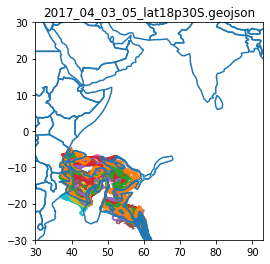

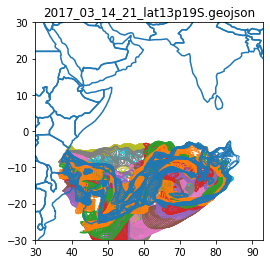

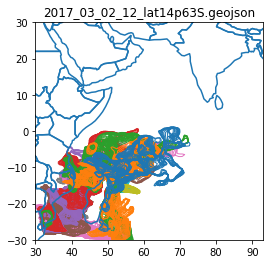

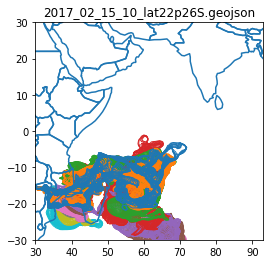

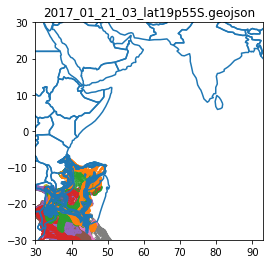

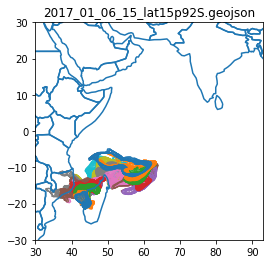

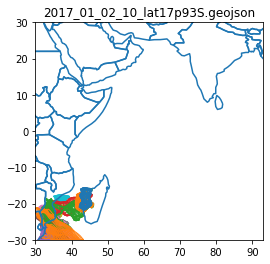

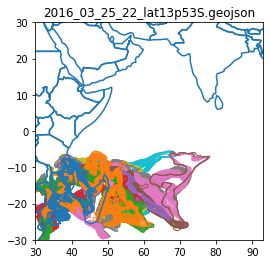

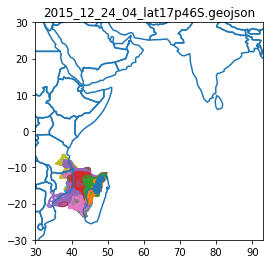

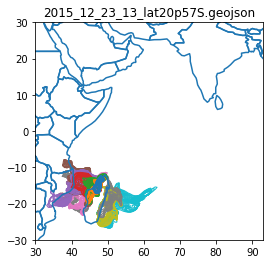

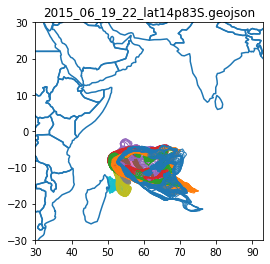

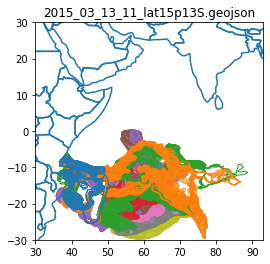

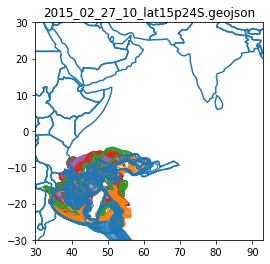

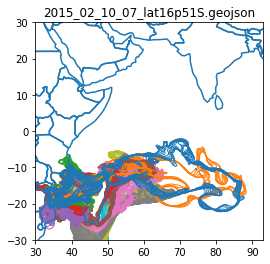

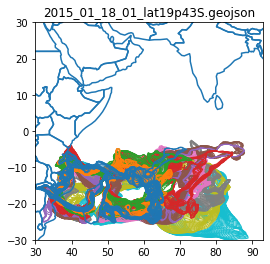

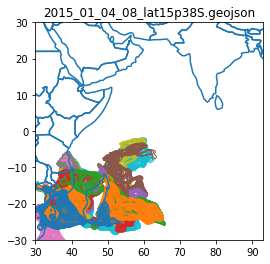

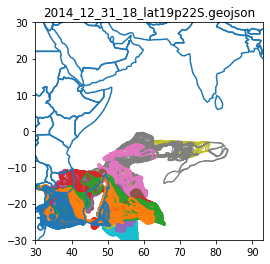

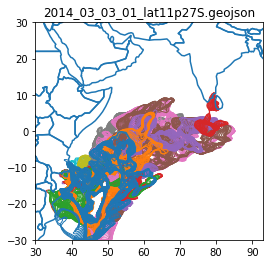

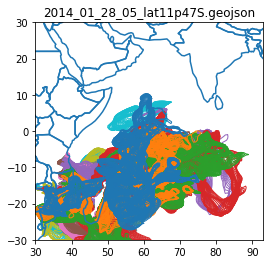

In [480]:
for file in SH7cases.filename: 
    gdf = showme(file)

In [453]:
biggies = dfu.sort_values('areatime', ascending=False)[0:10]
biggies

Unnamed: 0             lasttime          duration       areatime  \
2698           0  2014-01-28 05:00:00  27 days 05:00:00  140314.954315   
2263        2263  2015-01-18 01:00:00  10 days 12:00:00   86650.431899   
589          589  2018-01-15 17:00:00  11 days 14:00:00   76016.117437   
639          639  2017-12-20 14:00:00  11 days 20:00:00   66789.610035   
1654        1654  2016-01-26 17:00:00   4 days 19:00:00   57156.558526   
2172        2172  2015-03-13 11:00:00  13 days 15:00:00   54462.702745   
590          590  2018-01-13 17:00:00   9 days 14:00:00   54144.405837   
2283        2283  2015-01-04 08:00:00  19 days 16:00:00   54081.023444   
1087        1087  2017-03-14 21:00:00   7 days 03:00:00   52408.361466   
1506        1506  2016-03-25 22:00:00  11 days 17:00:00   45571.603834   

      tqv_values     maxarea                         filename           ymdh  \
2698        55.0  450.351350  2014_01_28_05_lat11p47S.geojson  2014_01_28_05   
2263        55.0  430.645702  2015_01_18_01_lat19p43S.geojson  2015_01_18_01   
589         55.0  397.221642  2018_01_15_17_lat13p94S.geojson  2018_01_15_17   
639         55.0  313.427667  2017_12_20_14_lat11p56S.geojson  2017_12_20_14   
1654        55.0  602.410193  2016_01_26_17_lat13p22S.geojson  2016_01_26_17   
2172        55.0  319.810743  2015_03_13_11_lat15p13S.geojson  2015_03_13_11   
590         55.0  352.936667  2018_01_13_17_lat20p79S.geojson  2018_01_13_17   
2283        55.0  257.891597  2015_01_04_08_lat15p38S.geojson  2015_01_04_08   
1087        55.0  408.540382  2017_03_14_21_lat13p19S.geojson  2017_03_14_21   
1506        55.0  258.826780  2016_03_25_22_lat13p53S.geojson  2016_03_25_22   

      dur_days  yyyy  mm  coastlat  
2698        27  2014   1    -11.47  
2263        10  2015   1    -19.43  
589         11  2018   1    -13.94  
639         11  2017  12    -11.56  
1654         4  2016   1    -13.22  
2172        13  2015   3    -15.13  
590          9  2018   1    -20.79  
2283        19  2015   1    -15.38  
1087         7  2017   3    -13.19  
1506        11  2016   3    -13.53

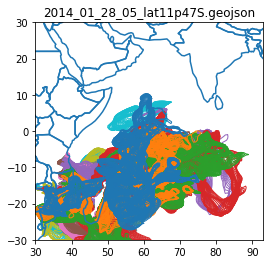

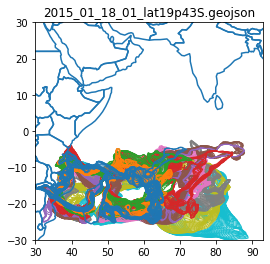

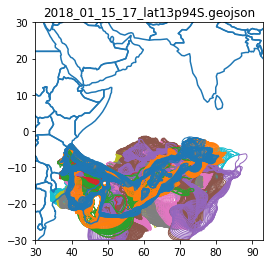

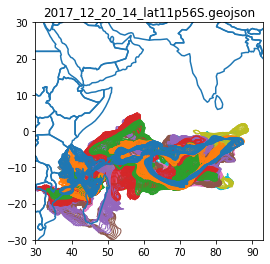

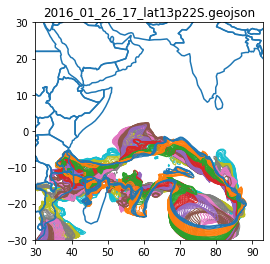

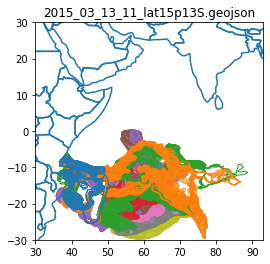

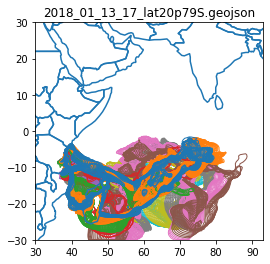

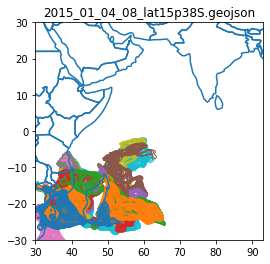

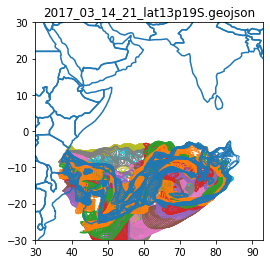

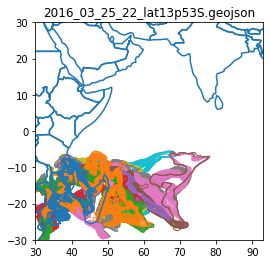

In [454]:
for file in biggies.filename: 
    gdf = showme(file)

In [455]:
longduration = dfu.sort_values('duration', ascending=False)[0:10]
longduration

Unnamed: 0             lasttime         duration      areatime  \
1759        1759  2015-12-23 13:00:00  9 days 18:00:00   5750.342293   
625          625  2017-12-29 07:00:00  9 days 17:00:00   9524.130325   
973          973  2017-04-29 11:00:00  9 days 15:00:00   7493.295378   
590          590  2018-01-13 17:00:00  9 days 14:00:00  54144.405837   
2193        2193  2015-02-27 10:00:00  9 days 09:00:00  22775.354693   
2471        2471  2014-05-11 18:00:00  9 days 09:00:00   6060.850143   
945          945  2017-05-08 05:00:00  9 days 07:00:00   9695.018611   
478          478  2018-02-26 18:00:00  9 days 06:00:00  27663.702069   
1964        1964  2015-06-19 22:00:00  8 days 21:00:00  13250.277194   
1229        1229  2017-01-07 14:00:00  8 days 19:00:00  12738.007722   

      tqv_values     maxarea                         filename           ymdh  \
1759        55.0   52.758027  2015_12_23_13_lat20p57S.geojson  2015_12_23_13   
625         55.0   77.557244  2017_12_29_07_lat13p53S.geojson  2017_12_29_07   
973         55.0   97.229094  2017_04_29_11_lat7p001S.geojson  2017_04_29_11   
590         55.0  352.936667  2018_01_13_17_lat20p79S.geojson  2018_01_13_17   
2193        55.0  218.583429  2015_02_27_10_lat15p24S.geojson  2015_02_27_10   
2471        55.0   72.174952  2014_05_11_18_lat2p131S.geojson  2014_05_11_18   
945         55.0  124.822389  2017_05_08_05_lat1p160N.geojson  2017_05_08_05   
478         55.0  305.017767  2018_02_26_18_lat14p80S.geojson  2018_02_26_18   
1964        55.0  155.181848  2015_06_19_22_lat14p83S.geojson  2015_06_19_22   
1229        55.0  203.820924  2017_01_07_14_lat6p991S.geojson  2017_01_07_14   

      dur_days  yyyy  mm  coastlat  
1759         9  2015  12   -20.570  
625          9  2017  12   -13.530  
973          9  2017   4    -7.001  
590          9  2018   1   -20.790  
2193         9  2015   2   -15.240  
2471         9  2014   5    -2.131  
945          9  2017   5     1.160  
478          9  2018   2   -14.800  
1964         8  2015   6   -14.830  
1229         8  2017   1    -6.991

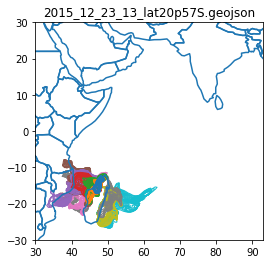

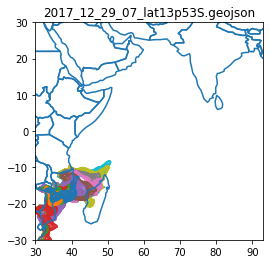

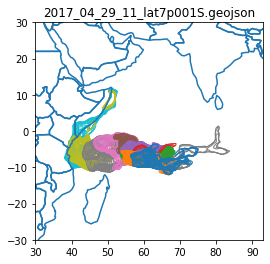

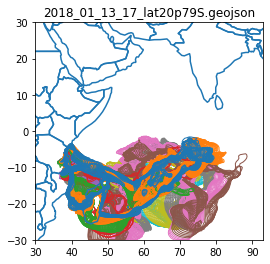

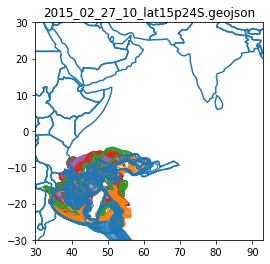

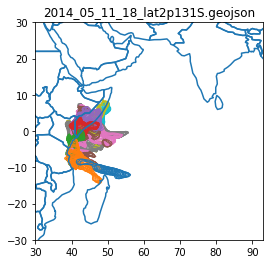

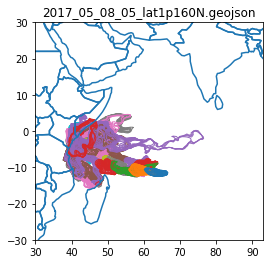

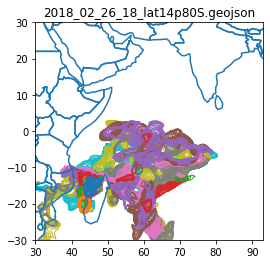

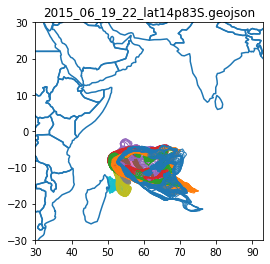

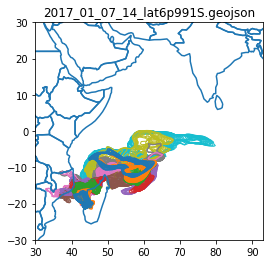

In [456]:
for file in longduration.filename: 
    gdf = showme(file)